




















# **Project Name**    -  Predicting Student Performance



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Team
##### **Team Member 1 -** 2210992455
##### **Team Member 2 -** 2210992509
##### **Team Member 3 -** 2210992510
##### **Team Member 4 -** 2210992514

# **Project Summary -**

After analyzing the dataset, I came up with the following statements. They are

1. Among the students who did well in either one of the subjects, only a few of them topped all three subjects.

2. Female students performed better than male students.

3. Male students are better at math than female students whereas Female students are better at reading and writing than male students.

4. Group D has the best performance rate.

5. Group A performed worse overall compared to other groups.

6. Parents' level of education seems to have an impact on the student's performance. The higher the level of education of the parents the better the performance of their children The students whose parents have master's degrees did the best. One reason could be as their parent knows the vahie of education; they help their children more in their studies because they went through the same process when they were stadeats.

7. The students who completed the test preparation course did significantly better than the ones who didn't.

8. The type of lunch doesn't have much impact on the student's performance.



# **GitHub Link -**

https://github.com/varsha-ky12/AIML-PROJECT

# **Problem Statement**


First, I wanted to list the questions I wanted to answer throughout the project. I believe 60% success of a project depends on the understanding of the problem. After going through the dataset thoroughly I came up with the following problems which I wanted to solve. They are

1. Among the top scorer, are they equally good in math, reading, and writing?

2. Among male and female students who are performing better?

3. What is the distribution of reading, writing and math scores?

4. What ethnicity is standing out?

5. Does the parent's education level have any effect on their performance?

6. What effect does 'test preparation' have on their performance?

7. Does lunch type affect their performance?

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### Dataset Loading

In [ ]:
# Load Dataset
exams = pd.read_csv('/content/exams.csv')

### Dataset First View

In [ ]:
# Dataset First Look
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [ ]:
exams.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62
999,male,group D,high school,standard,none,58,47,45


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rows_count = exams.shape[0]  # Number of rows
cols_count = exams.shape[1]  # Number of columns
print("rows",rows_count)
print("columns",cols_count)

rows 1000
columns 8


### Dataset Information

In [ ]:
# Dataset Info
exams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
exams.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
exams.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

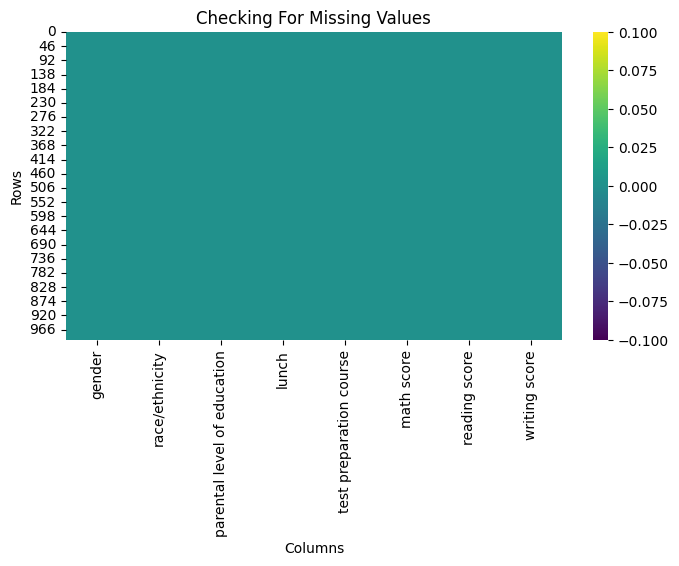

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(8,4))
sns.heatmap(exams.isnull(), cbar=True, cmap='viridis')
plt.title('Checking For Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()
# missing values are represented by colored cells. Cells with missing values will be a different color compared to cells with actual data, making it easy to visualize where missing values occur in our dataset.
#from above analysis we know we dont have any missing values though,thus we expect a monochromatic heatmap (single colored map)

### What did you know about your dataset?

Our dataset contains information about high school students' performance, influenced by several factors.It is consist of marks secured in various subjects by students in the United States.

This dataset is often used for educational data analysis and exploring factors influencing students' academic performance.

Here's a brief overview of the typical features included in the dataset:

Attributes related to demographics:

(1) Gender: Gender of the student (e.g., male or female).


(2) Race/Ethnicity: Ethnic background or race of the student (e.g., Group A, Group B, etc.).


(3) Educational background:
Parental Level of Education: Education level of the student's parents or guardians (e.g., some high school, bachelor's degree, etc.).


(4) Lunch: Whether the student receives free/reduced-price lunch or not, which can serve as an indicator of socioeconomic status.


(5) Academic performance:

Math Score: The score achieved by the student in the mathematics exam.

Reading Score: The score achieved by the student in the reading exam.

Writing Score: The score achieved by the student in the writing exam.

The dataset also includes additional information such as student IDs, test preparation course completion status, and other related attributes.

Altogether, our dataset has a thousand rows and eight columns with no missing/null values or duplicate records.








## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
exams.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# Dataset Describe
exams.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


### Variables Description

We have five categorical and three numerical variables.

CATEGORICAL:

(1) Gender: Gender of the student (e.g., male or female).

(2) Race/Ethnicity: Ethnic background or race of the student (e.g., Group A, Group B, etc.).

(3) Educational background: Parental Level of Education: Education level of the student's parents or guardians (e.g., some high school, bachelor's degree, etc.).

(4) Lunch: Whether the student receives free/reduced-price lunch or not, which can serve as an indicator of socioeconomic status.

(5) Test preparation course: whether the student has opted for and completed the test preparation course or not.

NUMERICAL:

(1)Math Score: The score achieved by the student in the mathematics exam.

(2)Reading Score: The score achieved by the student in the reading exam.

(3)Writing Score: The score achieved by the student in the writing exam.


In [ ]:
exams.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,male,group C,some college,standard,none,NaN,NaN,NaN
freq,508,323,224,660,656,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,67.810000,70.382000,69.140000
std,NaN,NaN,NaN,NaN,NaN,15.250196,14.107413,15.025917
min,NaN,NaN,NaN,NaN,NaN,15.000000,25.000000,15.000000
25%,NaN,NaN,NaN,NaN,NaN,58.000000,61.000000,59.000000
50%,NaN,NaN,NaN,NaN,NaN,68.000000,70.500000,70.000000
75%,NaN,NaN,NaN,NaN,NaN,79.250000,80.000000,80.000000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
exams['gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
exams['race/ethnicity'].unique()

array(['group D', 'group B', 'group C', 'group E', 'group A'],
      dtype=object)

In [ ]:
exams['parental level of education'].unique()

array(['some college', "associate's degree", 'some high school',
       "bachelor's degree", "master's degree", 'high school'],
      dtype=object)

In [ ]:
exams['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [ ]:
exams['test preparation course'].unique()

array(['completed', 'none'], dtype=object)

In [ ]:
exams['math score'].unique()

array([ 59,  96,  57,  70,  83,  68,  82,  46,  80,  74,  53,  76,  55,
        56,  35,  87,  65,  66,  67,  89,  99,  58,  90,  69,  32,  86,
        52,  63,  62,  79,  71,  61,  75,  73,  64,  23,  41,  84,  85,
        88,  91,  51, 100,  48,  98,  72,  43,  50,  38,  81,  47,  49,
        44,  60,  93,  77,  20,  78,  94,  39,  42,  54,  37,  45,  27,
        92,  95,  34,  97,  31,  40,  33,  21,  25,  28,  15,  24,  30,
        36])

In [ ]:
exams['reading score'].unique()

array([ 70,  93,  76,  85,  57,  83,  61,  75,  69,  50,  74,  73,  54,
        46,  47,  92,  82,  71,  66,  88,  52,  79,  87,  81,  78,  35,
        53,  56,  77,  72,  67,  64,  86,  68,  34,  91,  62,  33,  58,
        49,  80,  89,  97,  65,  51,  96,  84,  90,  95,  55,  60,  99,
        45,  63,  98,  40,  94,  59,  48,  25,  39,  43,  44,  27, 100,
        42,  30,  32,  38,  41,  37])

In [ ]:
exams['writing score'].unique()

array([ 78,  87,  77,  63,  86,  54,  80,  58,  73,  69,  49,  76,  70,
        52,  43,  41,  81,  85,  74,  62,  71,  88,  72,  51,  59,  79,
        75,  37,  82,  48,  67,  65,  90,  68,  56,  84,  61,  93,  66,
        36,  57,  33,  46,  89,  95,  42,  91,  60,  38,  83,  97,  64,
        53, 100,  55,  47,  50,  94,  44,  99,  92,  15,  40,  98,  19,
        96,  35,  32,  26,  28,  45,  27,  30,  23])

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Addding two columns i.e.,total and average
exams['total']=exams['math score']+exams['reading score'] +exams['writing score']
exams['average']=exams['total']/3
exams.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667


In [ ]:
#Sorting Female Students Records
fstudents=exams[(exams['gender']=='female')]
fstudents.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group D,some college,standard,completed,59,70,78,207,69.000000
2,female,group D,some college,free/reduced,none,57,76,77,210,70.000000
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667
6,female,group E,associate's degree,standard,none,82,83,80,245,81.666667
7,female,group B,some high school,standard,none,46,61,58,165,55.000000


In [ ]:
#Number of female Students
fstudents.shape[0]

492

In [ ]:
#Sorting Male Student records
mstudents=exams[(exams['gender']=='male')]
mstudents.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
1,male,group D,associate's degree,standard,none,96,93,87,276,92.000000
3,male,group B,some college,free/reduced,none,70,70,63,203,67.666667
5,male,group C,some high school,standard,none,68,57,54,179,59.666667
8,male,group C,some high school,standard,none,80,75,73,228,76.000000
10,male,group B,some high school,standard,none,74,69,69,212,70.666667


In [ ]:
#Number of male students
mstudents.shape[0]

508

In [ ]:
# Students scoring more than 90 in all the three subjects
high_in_all=exams[(exams['math score']>90) & (exams['reading score']>90) & (exams['writing score']>90)].reset_index()
high_in_all.head()

,index,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,81,male,group D,master's degree,free/reduced,completed,91,93,95,279,93.000000
1,85,male,group D,master's degree,standard,none,100,97,91,288,96.000000
2,95,female,group C,associate's degree,standard,completed,91,96,97,284,94.666667
3,115,female,group E,bachelor's degree,standard,none,98,95,100,293,97.666667
4,156,female,group B,associate's degree,standard,completed,91,99,100,290,96.666667


In [ ]:
# Number of students good in all the three subjects
high_in_all.shape[0]

27

In [ ]:
# Students scoring less than 70 in all the three subjects
low_in_all=exams[(exams['math score']<70) & (exams['reading score']<70) & (exams['writing score']<70)]
low_in_all.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
5,male,group C,some high school,standard,none,68,57,54,179,59.666667
7,female,group B,some high school,standard,none,46,61,58,165,55.000000
11,male,group B,master's degree,standard,none,53,50,49,152,50.666667
14,male,group C,master's degree,free/reduced,none,55,54,52,161,53.666667
15,male,group E,master's degree,free/reduced,none,56,46,43,145,48.333333


In [ ]:
# Number of students poor in all the three subjects
low_in_all.shape[0]

374

In [ ]:
# Sorting mid scorers
df1=exams[(exams['math score']>70) & (exams['reading score']>70) & (exams['writing score']>70)]
medium_in_all=df1[(df1['math score']<90) & (df1['reading score']<90) & (df1['writing score']<90)]
medium_in_all.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
4,female,group D,associate's degree,standard,none,83,85,86,254,84.666667
6,female,group E,associate's degree,standard,none,82,83,80,245,81.666667
8,male,group C,some high school,standard,none,80,75,73,228,76.000000
12,male,group B,bachelor's degree,free/reduced,none,76,74,76,226,75.333333
18,female,group E,associate's degree,free/reduced,none,80,82,85,247,82.333333


In [ ]:
#Number of mid scorers
medium_in_all.shape[0]

192

### What all manipulations have you done and insights you found?

I have done following manipulations to my dataset.

1.I have added two new columns i.e., 'total' and 'average'.

2.I have subset dataframe for analyzing the data more critically among different categories.
Resulting dataframes are as follows:

a.high_in_all

b.low_in_all

c.mid_in-all

d.fstudents

e.mstudents

Following are the insights found:-

1.Only 2.7 percent of the students are top scorers.

2.Of all the students , 37.4 percent are bottom scorers.

3.While 19.2 percent of the students are mid scorers.

4.Nearly equal number of female and male students' records are present in my dataset (females=492, males=508).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

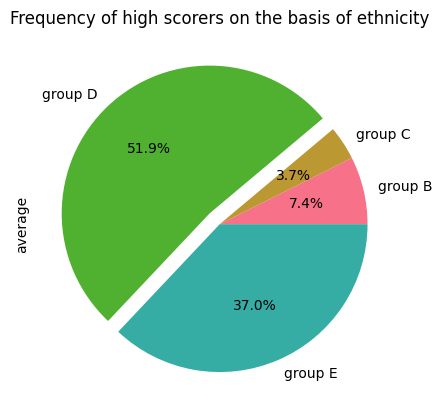

In [ ]:
# Chart - 1 visualization code
temp_df=high_in_all.groupby('race/ethnicity')['average'].size()
palette_color = sns.color_palette('husl')
g=temp_df.plot(kind='pie',explode=[0,0,0.1,0],autopct='%0.1f%%',colors=palette_color)
g.set_title("Frequency of high scorers on the basis of ethnicity",y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to check among the high scorers,which ethnicity stands out , so I needed a chart that allows for a comparison of the sizes of different categories directly.The pie chart met my needs.
The clear divisions of it make it easy for viewers to grasp the relative sizes of each category at a glance.Each slice of the pie represents a proportion of the whole, making it easy to see how each category contributes to the total.


##### 2. What is/are the insight(s) found from the chart?

1.More than 50% of high scorers belong to Group D followed by the high scorers of Group E.
Thus we can say that students from Group D and Group E are far more likely to perform great in exams.

2.Group C has the least number of high scorers and Not a single student from Group A is a high scorer.
Thus we can say that students from Group C are far less likely to perform great in exams whereas students from Group A has near to null possibility of performing great in exams.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



1.(a)Positive Impact: This insight suggests that students from Groups D and E tend to perform well academically, which could be valuable information for educational institutions, tutoring services, or businesses targeting these student demographics.

1.(b)Negative Growth Risk: While it's true that a high proportion of high scorers come from Groups D and E, it doesn't necessarily mean that all students from these groups perform well academically. Over-relying on this insight without considering other factors such as individual student abilities, teaching quality, or socioeconomic background could lead to neglecting students from other groups who may also have the potential for academic success. This oversight could result in missed opportunities for educational improvement and equitable support for all students.

2.(a)Positive Impact: This insight could inform targeted interventions or support programs for students in Group C to improve their academic performance. Similarly, it could highlight the need for additional resources or strategies to address the challenges faced by students in Group A.

2.(b)Negative Growth Risk: Assuming that students from Group C are inherently less likely to perform well academically without considering underlying factors such as access to resources, teaching quality, or individual student motivation could perpetuate stereotypes and inequalities. Similarly, writing off students from Group A based solely on their group affiliation could result in missed opportunities for supporting their academic success. This narrow perspective could hinder efforts to create an inclusive and supportive learning environment, ultimately leading to negative growth in overall student outcomes.

#### Chart - 2

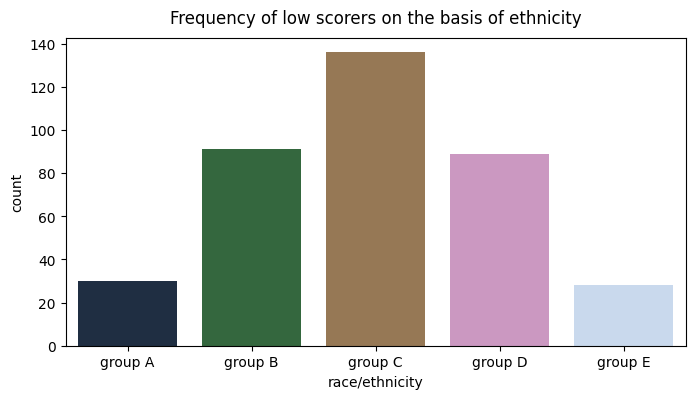

In [ ]:
# Chart - 2 visualization code
fig,ax=plt.subplots(figsize=(8,4))
j=sns.countplot(x="race/ethnicity",data=low_in_all.sort_values(by="race/ethnicity"),hue='race/ethnicity',palette='cubehelix')
j.set_title("Frequency of low scorers on the basis of ethnicity",y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

 I wanted to check which ethnicity has more number of low scorers , so I needed a chart that compare the frequency distributions across different categories or subgroups.Then I found the countplot as the most appropriate.

##### 2. What is/are the insight(s) found from the chart?

Greatest number of low scorers belong to Group C.Thus we can say that students from Group C are far more likely to perform poorly in exams.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

To determine if the gained insights will help create a positive business impact, we need to consider several factors:


1.Underlying Causes: Understanding why students from Group C are scoring lower is essential. Are there socio-economic factors, learning environment issues, or other external factors influencing their performance? Addressing these underlying causes can lead to more effective interventions.

2.Impact on Business Goals: If the business's goal is to improve academic performance or provide equal educational opportunities, identifying and addressing disparities among student groups can be valuable. Implementing targeted interventions, such as additional tutoring, mentorship programs, or resource allocation, can help improve outcomes for students from Group C.

3.Ethical Considerations: It's important to approach the issue with sensitivity and avoid stigmatizing or stereotyping students based on their group affiliation. Any interventions should focus on providing support and resources rather than attributing blame.

#### Chart - 3

Text(0.5, 1.0, 'PROBABILITY DENSITY FOR WRITING SCORES')

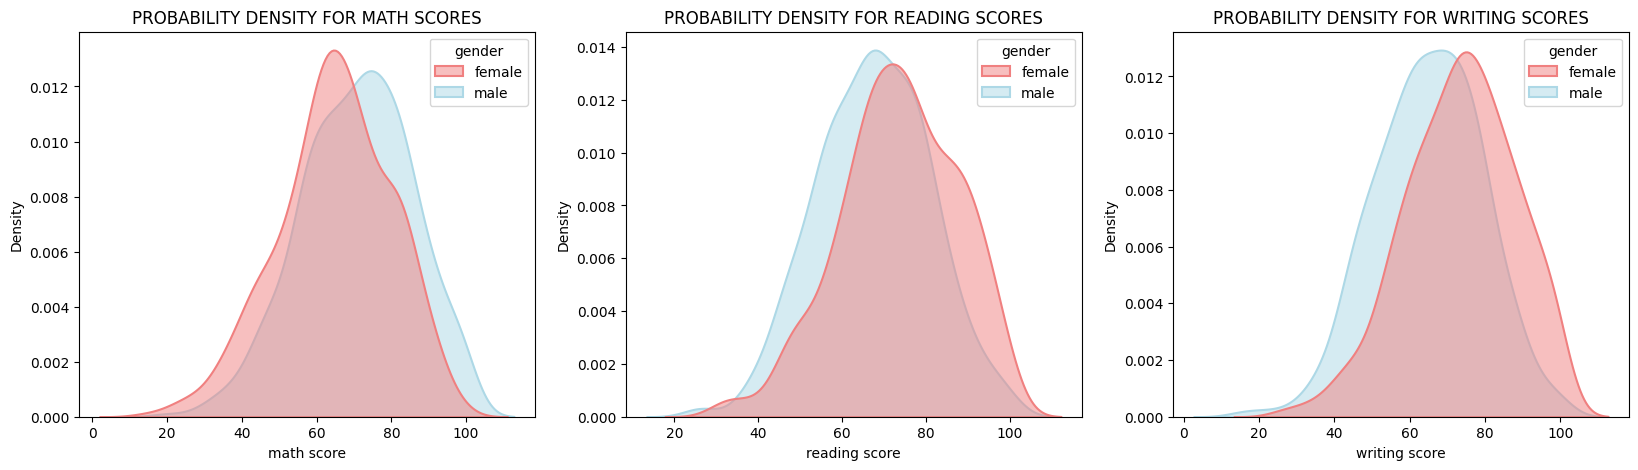

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(20,5))


plt.subplot(1,3,1)
sns.kdeplot(x="math score",data=exams,hue='gender',palette={'male':'lightblue','female':'lightcoral'},alpha=.5, linewidth=1.5,fill=True)
plt.title("PROBABILITY DENSITY FOR MATH SCORES")

plt.subplot(1,3,1)
plt.subplot(1,3,2)
sns.kdeplot(x="reading score",data=exams,hue='gender',palette={'male':'lightblue','female':'lightcoral'},alpha=.5, linewidth=1.5,fill=True)
plt.title("PROBABILITY DENSITY FOR READING SCORES")

plt.subplot(1,3,1)
plt.subplot(1,3,3)
sns.kdeplot(x="writing score",data=exams,hue='gender',palette={'male':'lightblue','female':'lightcoral'},alpha=.5, linewidth=1.5,fill=True)
plt.title("PROBABILITY DENSITY FOR WRITING SCORES")

##### 1. Why did you pick the specific chart?

I wanted a chart for visual comparison of distribution of scores between male and female students , to identify differences or similarities in the data distribution.For this I found the kde plot as appropriate. They offer a continuous representation of the data distribution, making it easy to identify patterns, peaks, and areas of high density.








##### 2. What is/are the insight(s) found from the chart?

1.Male students have performed great in maths in comparison to the female students.

2.Female students have performed great in reading and writing in comparison to the male students.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights do help creating a positive business impact and lead to negative growth somewhere as well.

Positive Impact:

1.Targeted Marketing: Understanding the strengths of each gender in different subjects can help businesses tailor their marketing strategies accordingly. For example, educational companies can create targeted advertising campaigns for math-related products towards male students and reading/writing-related products towards female students.

2.Product Development: Insights into gender-specific academic performance can guide businesses in developing educational products and services that cater to the specific needs and strengths of each gender. This targeted approach can potentially lead to increased customer satisfaction and loyalty.

3.Diversity and Inclusion Initiatives: Businesses can use these insights to inform their diversity and inclusion initiatives. By recognizing and addressing disparities in academic performance between genders, companies can create more inclusive environments that support the development and success of all employees.

Negative Impact:

1.Stereotyping and Bias: Overreliance on gender-based academic performance data can perpetuate stereotypes and biases. Assuming that all male students excel in math and all female students excel in reading/writing can lead to unfair treatment and missed opportunities for individuals who don't fit these stereotypes.

2.Limited Perspective: Focusing solely on gender differences in academic performance may overlook other factors that influence success, such as socioeconomic background, access to resources, and individual learning styles. Ignoring these factors can result in missed opportunities for business growth and innovation.

#### Chart - 4

Text(0.5, 1.0, 'TEST PREPARATORY COURSE Vs MATH SCORES OF FEMALE STUDENTS')

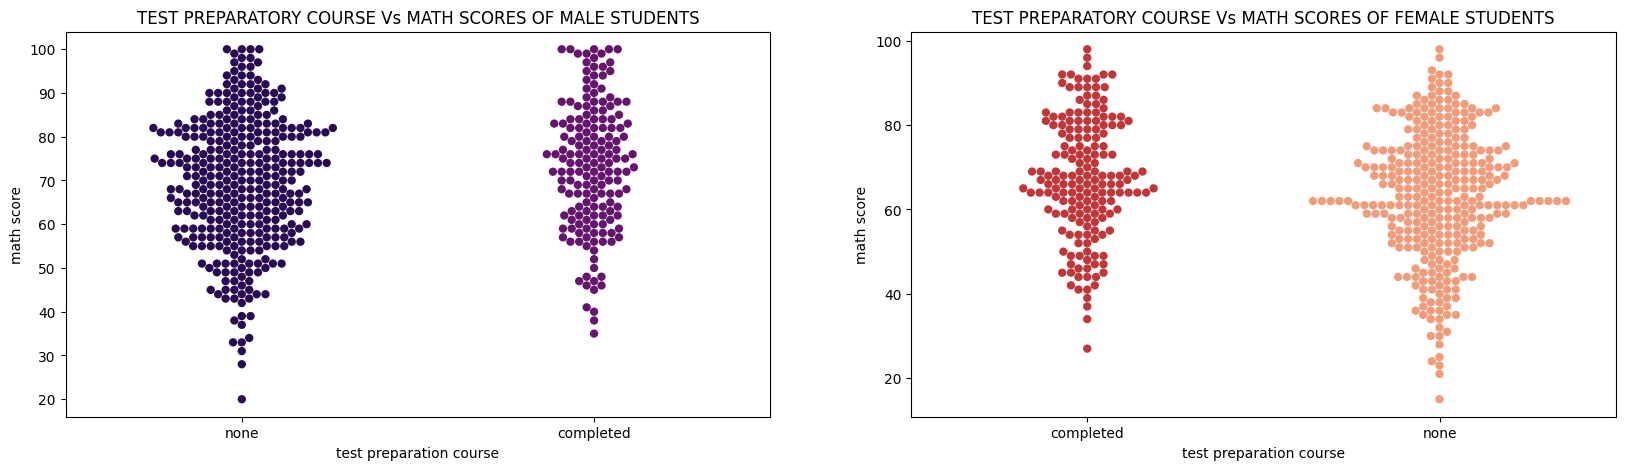

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(20,5))

custom_palette = sns.set_palette("inferno")
plt.subplot(1,2,1)
sns.swarmplot(x="test preparation course",y="math score",data=mstudents,hue='test preparation course',s=6,legend=False,palette=custom_palette)
plt.title("TEST PREPARATORY COURSE Vs MATH SCORES OF MALE STUDENTS")
custom_palette = sns.set_palette("RdBu")
plt.subplot(1,2,1)
plt.subplot(1,2,2)
sns.swarmplot(x="test preparation course",y="math score",data=fstudents,hue='test preparation course',s=6,legend=False,palette=custom_palette)
plt.title("TEST PREPARATORY COURSE Vs MATH SCORES OF FEMALE STUDENTS")

##### 1. Why did you pick the specific chart?

 Dealing with my moderate-sized dataset,I wanted to visualize individual data points while comparing different categories within my dataset.So I picked swarm plot to do this job.
By plotting multiple swarms side by side, I could easily compare the distributions of different groups and identify differences and similarities between them.
Unlike traditional scatter plots, swarm plots use a "swarm" algorithm to
arrange points without overlapping, making it easier to visualize dense clusters of data points.



##### 2. What is/are the insight(s) found from the chart?

1.Test preparation course does not have much impact on the math score of students.

2.But for the ones who have completed the test preparation course they are less likely to fall in the category of bottom scorers.

3.few of the students who did not opted for or complete test preparation course
are the bottom scorers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can indeed lead to positive business impacts for entities involved in offering test preparation courses or educational services. Here's how:

Positive Business Impacts:

1.Tailored Marketing Strategies: Understanding that test preparation courses may not significantly impact overall math scores but can reduce the likelihood of being a bottom scorer allows businesses to tailor their marketing strategies. They can emphasize the risk reduction aspect of their courses, targeting students who are concerned about falling into the lowest scoring category.

2.Improved Course Design: With the knowledge that completing a test preparation course correlates with a reduced likelihood of being a bottom scorer, businesses can refine and improve their course offerings. They can focus on developing strategies and materials specifically aimed at preventing students from falling into the bottom scorer category, thereby enhancing the perceived value of their courses.

3.Enhanced Customer Satisfaction: By addressing the specific concerns of students regarding their math scores, businesses can enhance customer satisfaction. Students may feel more confident in their abilities and perceive the course as valuable, leading to positive word-of-mouth referrals and repeat business.

Negative Growth:
However, there are potential negative implications to consider as well:

1.Decreased Enrollment for Test Preparation Courses: If students perceive that test preparation courses have minimal impact on overall math scores, they may be less inclined to enroll in such courses. This could lead to decreased revenue for businesses offering these services, particularly if they fail to effectively communicate the secondary benefit of reducing the likelihood of being a bottom scorer.

2.Potential for Diminished Brand Reputation: If customers feel misled or disappointed by the perceived lack of impact of test preparation courses on math scores, it could lead to negative reviews and a diminished brand reputation. This could deter potential customers from engaging with the business in the future, further impacting growth negatively.

#### Chart - 5

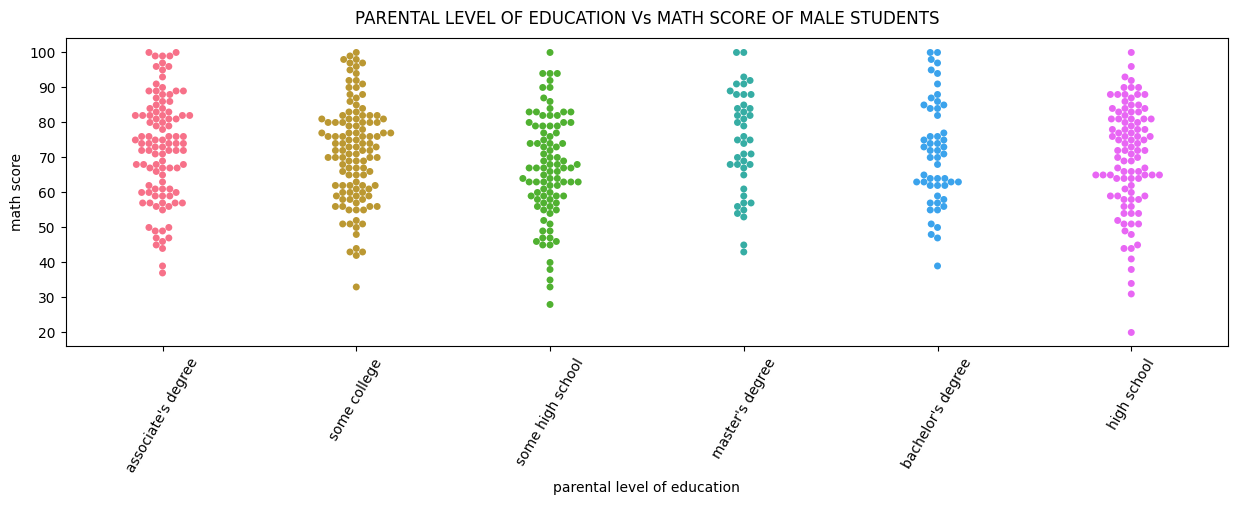

In [ ]:
# Chart - 5 visualization code
fig,ax=plt.subplots(figsize=(15,4))
custom_palette=sns.set_palette("husl")
g=sns.swarmplot(y="math score",x="parental level of education",data=mstudents,hue='parental level of education',palette=custom_palette)
plt.xticks(rotation=60)
g.set_title("PARENTAL LEVEL OF EDUCATION Vs MATH SCORE OF MALE STUDENTS",y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

For my moderate-sized dataset,I wanted to visualize individual data points while comparing different categories within my dataset.So I picked swarm plot to do this job. By plotting multiple swarms side by side, I could easily compare the distributions of different groups and identify differences and similarities between them. Unlike traditional scatter plots, swarm plots use a "swarm" algorithm to arrange points without overlapping, making it easier to visualize dense clusters of data points.

##### 2. What is/are the insight(s) found from the chart?

1.Male students(more in number) whose parents held associat's degree or completed college , have fairly good math scores than others with different parental level of education.

2.Male students( less in number) whose parents held master's degree ,have scored good.None of them is a bottom scorer in maths.

3.Male students( more in number) whose parents just completed their high school studies , are the bottom scorers in maths,though some of them have scored good marks as well.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can indeed lead to positive business impacts for entities involved in educational services or test preparation courses. Here's how:

Positive Business Impacts:

Targeted Marketing Strategies: Understanding that male students whose parents have completed an associate's degree or college education tend to have better math scores can inform targeted marketing strategies. Businesses can tailor their marketing efforts to appeal to parents with these educational backgrounds, highlighting the potential benefits of their services for their children's academic success.

Customized Course Offerings: Recognizing that male students whose parents hold master's degrees tend to perform well in math can lead to the development of specialized course offerings. Businesses can create advanced math programs tailored to the needs of students with highly educated parents, catering to their desire for academic excellence.

Parental Involvement Initiatives: Given the influence of parental education on student performance, businesses can implement initiatives to engage parents more actively in their children's education. This could include workshops or resources specifically designed to support parents in fostering their children's math skills at home.

Negative Growth:
However, there are potential negative implications to consider as well:

Perception of Exclusivity: If businesses heavily focus on targeting students with highly educated parents or offering specialized programs for this demographic, it may create a perception of exclusivity. This could alienate students from less-educated backgrounds or those who do not meet the specified criteria, leading to decreased enrollment and potentially harming the business's growth.

Limited Reach and Accessibility: By primarily catering to students from specific demographic backgrounds, businesses may inadvertently limit their reach and accessibility. This could result in missed opportunities to serve a broader customer base and could hinder the business's potential for growth in the long term.

#### Chart - 6

Text(0.5, 1.0, 'WRITING SCORES OF MALE STUDENTS ON THE BASIS OF TEST PREPARATORY COURSE')

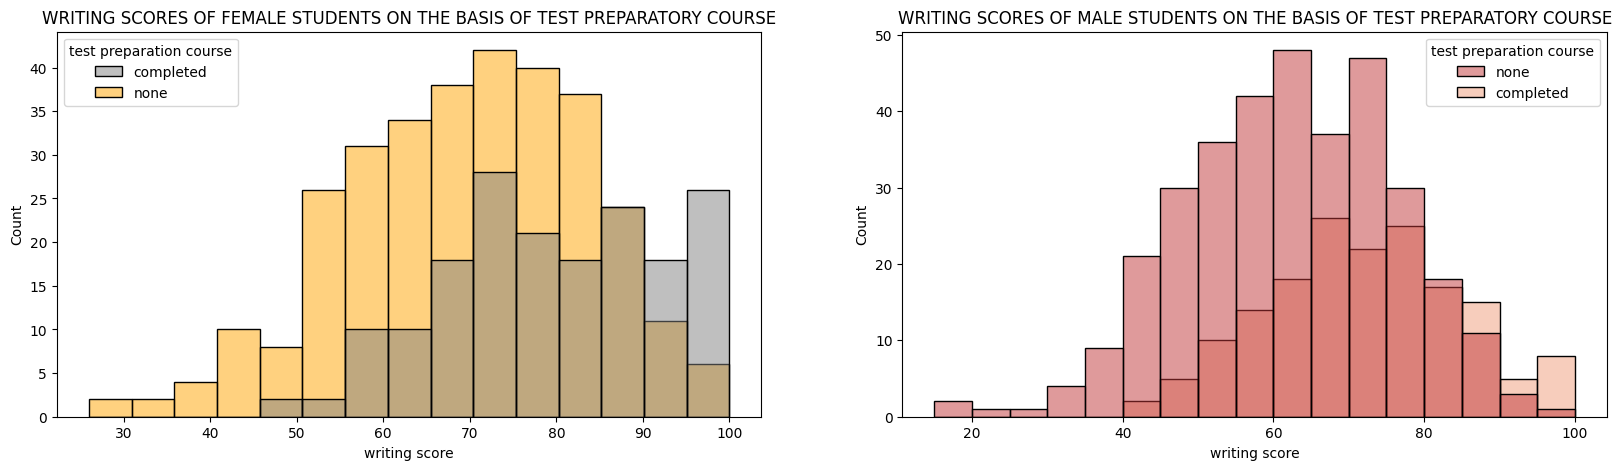

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(x="writing score",data=fstudents,hue='test preparation course',palette={'completed':'grey','none':'orange'})
plt.title("WRITING SCORES OF FEMALE STUDENTS ON THE BASIS OF TEST PREPARATORY COURSE")
custom_palette = sns.set_palette("RdBu")
plt.subplot(1,2,1)
plt.subplot(1,2,2)
sns.histplot(x="writing score",data=mstudents,hue='test preparation course',palette=custom_palette)
plt.title("WRITING SCORES OF MALE STUDENTS ON THE BASIS OF TEST PREPARATORY COURSE")

##### 1. Why did you pick the specific chart?

 I wanted to do the comparison between multiple subgroups within a dataset,to understand how different categories behave and interact with each other.I found histplots to be the most appropriate.
 Histograms are effective communication tools for presenting data insights to stakeholders, as they provide a clear and intuitive representation of the data distribution.

##### 2. What is/are the insight(s) found from the chart?

1.The students who have completed test preparatory course ,are the top scorers in reading and writing.

2.The students who have not opted for any test preparatory course ,are the mid and bottom scorers in reading and writing.

3.Female students are proportionally higher than the male students when we talk about the top scorers in reading and writing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can potentially lead to positive business impacts for entities involved in educational services or test preparation courses. Here's how:

Positive Business Impacts:

Tailored Marketing and Course Development: Understanding that students who have completed test preparatory courses tend to be top scorers in reading and writing can inform targeted marketing strategies. Businesses can highlight this success rate in their promotional materials to attract more students to their courses. Additionally, they can refine and improve their course offerings to further enhance students' reading and writing skills, potentially leading to increased enrollment and customer satisfaction.

Targeting Underperforming Students: Recognizing that students who have not opted for any test preparatory course tend to be mid and bottom scorers in reading and writing allows businesses to target this demographic with tailored interventions. They can develop remedial programs or personalized tutoring services to help these students improve their performance, thereby expanding their customer base and contributing to positive educational outcomes.

Gender-Specific Marketing: Given that female students are proportionally higher than male students among the top scorers in reading and writing, businesses can tailor their marketing efforts to appeal to this demographic. They can develop targeted campaigns aimed at female students, highlighting the benefits of their courses in improving reading and writing skills. This targeted approach can help attract more female students and enhance overall business performance.

Negative Growth:
However, there are potential negative implications to consider as well:

Gender Disparities: While the insight about female students being proportionally higher among the top scorers is useful for targeted marketing, it may also exacerbate existing gender disparities. If businesses focus solely on targeting female students, they may inadvertently neglect the needs of male students, leading to decreased enrollment among this demographic and potentially harming the business's growth.

Perception of Test Preparatory Courses: If the perception develops that test preparatory courses are the only route to achieving top scores in reading and writing, it may discourage students from seeking alternative learning methods or self-study. This could lead to decreased interest in test preparatory courses over time, negatively impacting business growth unless countered by effective marketing and communication strategies.

#### Chart - 7

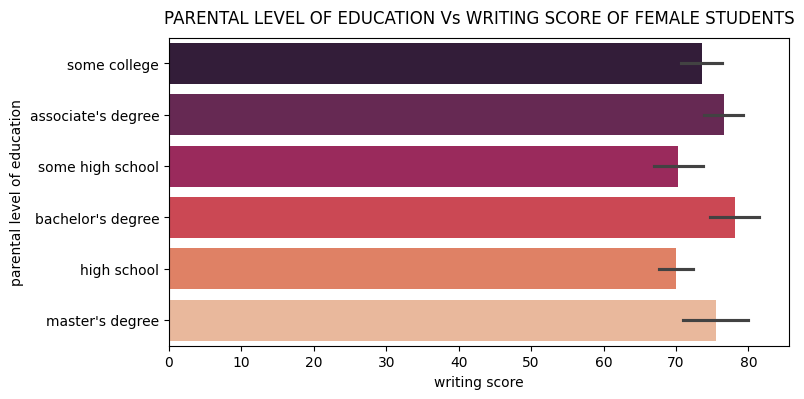

In [ ]:
# Chart - 7 visualization code
fig,ax=plt.subplots(figsize=(8,4))
custom_palette=sns.set_palette("rocket")
g=sns.barplot(x="writing score",y="parental level of education",data=fstudents,hue='parental level of education',palette=custom_palette)
#plt.xticks(rotation=60)
g.set_title("PARENTAL LEVEL OF EDUCATION Vs WRITING SCORE OF FEMALE STUDENTS",y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

I needed a plot for displaying the distribution of categorical variables that could represent the frequency or proportion of observations within each category, allowing for easy comparison between different groups or levels of a categorical variable.
And I found barplots as appropriate for that.





##### 2. What is/are the insight(s) found from the chart?

1.Female Students whose parents hold bachelor's, master's or associate's degree , are fairly the top scorers in writing and reading.

2.Female Students whose parents have just completed their high school studies , are the mid/bottom scorers in writing and reading.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can potentially lead to positive business impacts for entities involved in educational services or test preparation courses. Here's how:

Positive Business Impacts:

Targeted Marketing Strategies: Understanding that female students whose parents hold bachelor's, master's, or associate's degrees tend to be top scorers in writing and reading can inform targeted marketing strategies. Businesses can tailor their marketing efforts to appeal to parents with higher education backgrounds, highlighting the potential benefits of their services for their daughters' academic success. This targeted approach can attract more customers and increase enrollment in their courses.

Customized Course Offerings: Recognizing that parental education levels correlate with female students' academic performance allows businesses to develop customized course offerings. They can design programs specifically tailored to the needs of students from different educational backgrounds, ensuring that each group receives the support and resources necessary to excel in writing and reading. This personalized approach can enhance customer satisfaction and loyalty.

Parental Involvement Initiatives: Given the influence of parental education on student performance, businesses can implement initiatives to engage parents more actively in their daughters' education. They can provide resources, workshops, or guidance aimed at supporting parents in fostering their children's writing and reading skills at home. By empowering parents to play a more active role in their daughters' academic development, businesses can strengthen relationships with customers and improve overall outcomes.

Negative Growth:
However, there are potential negative implications to consider as well:

Exclusionary Practices: If businesses focus solely on targeting female students from families with higher levels of parental education, it may inadvertently exclude or overlook students from less-educated backgrounds. This could lead to decreased enrollment among these demographic groups, resulting in lost business opportunities and potentially exacerbating existing inequalities in education.

Perception of Inequality: Highlighting the disparities in academic performance based on parental education levels may reinforce perceptions of inequality or privilege within the education system. This could damage the reputation of businesses perceived as contributing to or benefiting from such inequalities, leading to negative publicity and decreased trust among stakeholders.

#### Chart - 8

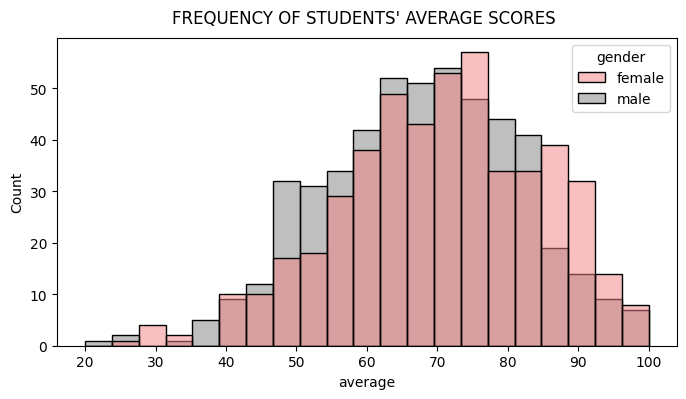

In [ ]:
# Chart - 8 visualization code
fig,ax=plt.subplots(figsize=(8,4))
g=sns.histplot(data=exams, x='average',hue='gender',palette={'male':'grey','female':'lightcoral'})
g.set_title("FREQUENCY OF STUDENTS' AVERAGE SCORES ",y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

I had to do the comparison between multiple subgroups within a dataset,to understand how different categories behave and interact with each other.I found histplots to be the most appropriate. Histograms are effective communication tools for presenting data insights to stakeholders, as they provide a clear and intuitive representation of the data distribution.

##### 2. What is/are the insight(s) found from the chart?

1.The count of female students scoring top average scores is higher than the male students.

2.The count of male students scoring mid to bottom average scores is higher than female students.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 These insights can potentially lead to both positive and negative business impacts for entities involved in educational services or test preparation courses. Let's explore each aspect:

Positive Business Impacts:

Targeted Marketing Strategies: Understanding that the count of female students scoring top average scores is higher than male students can inform targeted marketing strategies. Businesses can tailor their marketing efforts to appeal to female students, highlighting their success in achieving top scores. This can attract more female students to their courses, leading to increased enrollment and revenue.

Customized Course Offerings: Recognizing the higher count of male students scoring mid to bottom average scores allows businesses to develop customized course offerings to address their specific needs. They can design remedial programs or personalized tutoring services tailored to improve the academic performance of male students. This targeted approach can lead to higher satisfaction rates among male students and potentially attract more customers.

Negative Growth:
However, there are potential negative implications to consider as well:

Gender Bias Concerns: Highlighting the gender disparities in academic performance may raise concerns about gender bias within the education system. If businesses are perceived as perpetuating or exploiting these disparities for marketing purposes, it could lead to negative publicity and damage to their reputation. This may result in decreased trust among stakeholders and potential loss of business.

Exacerbating Gender Stereotypes: Emphasizing the differences in academic performance between male and female students may reinforce existing gender stereotypes. This could contribute to societal perceptions of certain subjects being more suitable for one gender over the other, potentially limiting educational opportunities and career choices for students. Businesses should be cautious about inadvertently reinforcing harmful stereotypes in their marketing efforts.

#### Chart - 9

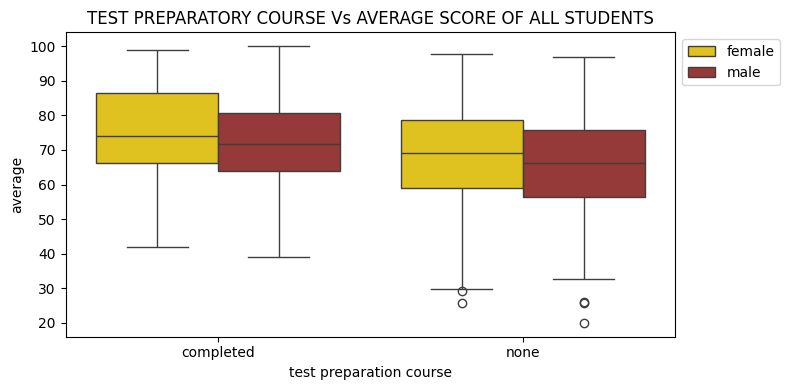

In [ ]:
# Chart - 9 visualization code
fig,ax=plt.subplots(figsize=(8,4))
g=sns.boxplot(data=exams, x='test preparation course',y='average',hue='gender',palette={'male':'brown','female':'gold'})
g.set_title("TEST PREPARATORY COURSE Vs AVERAGE SCORE OF ALL STUDENTS",y=1.0)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1))
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

 For visualization of the spread of the data, including the range of values and the variability within the dataset,for assessing the variability and dispersion of data points, which may inform decisions regarding data transformation or outlier handling,

 I had to pick box plot as it effectively highlight outliers within a dataset. Outliers, which are data points that significantly deviate from the rest of the data, are represented as individual points outside the whiskers of the box plot.

The length and position of the box relative to the median line can indicate whether the data is skewed or symmetrically distributed.
Identifying Central Tendency and Spread: Box plots display key summary statistics such as the median (middle line of the box), quartiles (boundaries of the box), and range (length of the whiskers). These measures help in understanding the central tendency and spread of the data, allowing for comparisons and assessments of variability.



##### 2. What is/are the insight(s) found from the chart?

1.Students who completed test preparation course , have secured higher average scores than the ones who did not opted for the course itself.

2.Female students outshine male students in scoring higher average scores in both the conditions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Let's examine the potential positive and negative implications:

Positive Business Impacts:

Enhanced Marketing Strategies: Understanding that completing a test preparation course correlates with higher average scores can inform marketing strategies. Businesses can highlight the benefits of their courses in improving academic performance, attracting more students to enroll in their programs. This targeted marketing approach can lead to increased enrollment and revenue for the business.

Customized Offerings: Recognizing that female students outshine male students in scoring higher average scores allows businesses to develop customized offerings tailored to the needs of female students. They can design programs specifically geared towards enhancing the academic success of female students, addressing their unique learning styles and preferences. This tailored approach can attract more female students and improve overall customer satisfaction.

Negative Growth:
However, there are potential negative implications to consider as well:

Gender Disparity Concerns: While the insight about female students outperforming male students can inform targeted marketing, it may also raise concerns about gender disparities within education. Emphasizing these differences without addressing underlying factors contributing to gender gaps in academic performance could perpetuate stereotypes and inequalities. This could lead to negative publicity and damage to the business's reputation, potentially resulting in decreased enrollment from certain demographic groups.

Perception of Test Preparation Courses: Emphasizing the importance of completing a test preparation course for achieving higher scores may create a perception that success is solely dependent on such courses. This could deter students from pursuing alternative learning methods or self-study approaches, leading to decreased interest in test preparation courses over time. Businesses should be mindful of this potential consequence and focus on promoting a balanced approach to academic success.

#### Chart - 10

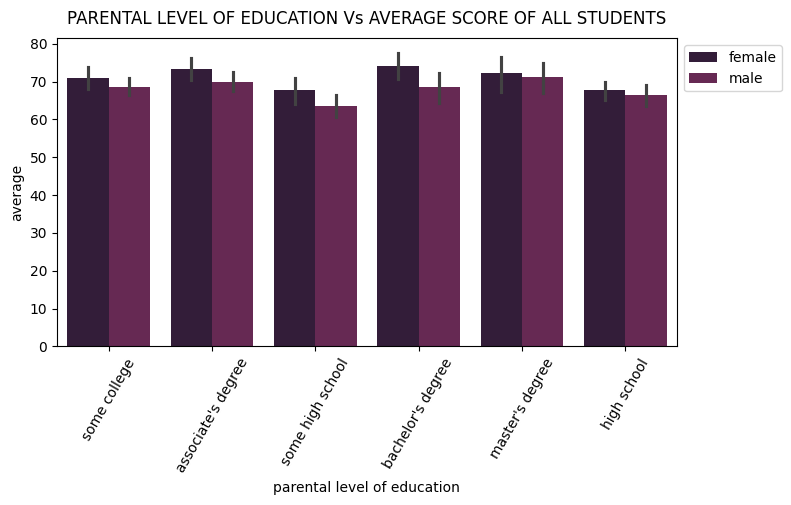

In [ ]:
# Chart - 10 visualization code
fig,ax=plt.subplots(figsize=(8,4))
custom_palette=sns.set_palette("rocket")
g=sns.barplot(y="average",x="parental level of education",data=exams,hue='gender',palette=custom_palette)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1))
plt.xticks(rotation=60)
g.set_title("PARENTAL LEVEL OF EDUCATION Vs AVERAGE SCORE OF ALL STUDENTS",y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

I needed a plot for displaying the distribution of categorical variables that could represent the frequency or proportion of observations within each category, allowing for easy comparison between different groups or levels of a categorical variable. And I found barplots as appropriate for that.

##### 2. What is/are the insight(s) found from the chart?

1.Students whose parents hold associate's or bachelor's degree have secured higher average scores than others.

2.Students whose parents have just come from high school , have relatively lower average scores than others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can potentially lead to both positive and negative business impacts for entities involved in educational services or test preparation courses. Let's examine each aspect:

Positive Business Impacts:

Targeted Marketing Strategies: Understanding the correlation between parental education levels and students' academic performance allows businesses to develop targeted marketing strategies. They can tailor their marketing efforts to appeal to parents with higher education backgrounds, highlighting the potential benefits of their services for their children's academic success. This targeted approach can attract more customers and increase enrollment in their courses.

Customized Offerings: Recognizing that parental education levels influence students' academic performance enables businesses to develop customized offerings tailored to the needs of different student demographics. They can design programs specifically geared towards supporting students from various educational backgrounds, providing resources and support that address their unique challenges and goals. This personalized approach can lead to higher satisfaction rates among students and parents, fostering loyalty and positive word-of-mouth referrals.

Negative Growth:
However, there are potential negative implications to consider as well:

Perception of Exclusivity: If businesses heavily focus on targeting students from families with higher levels of parental education, it may create a perception of exclusivity. This could alienate students from less-educated backgrounds or those who do not meet the specified criteria, leading to decreased enrollment and potentially limiting the business's growth potential.

Reinforcing Inequality: Emphasizing the disparities in academic performance based on parental education levels may reinforce existing inequalities within the education system. This could contribute to societal perceptions of certain students being more deserving of educational opportunities than others, potentially exacerbating disparities and hindering efforts towards equity and inclusivity in education.

#### Chart - 11

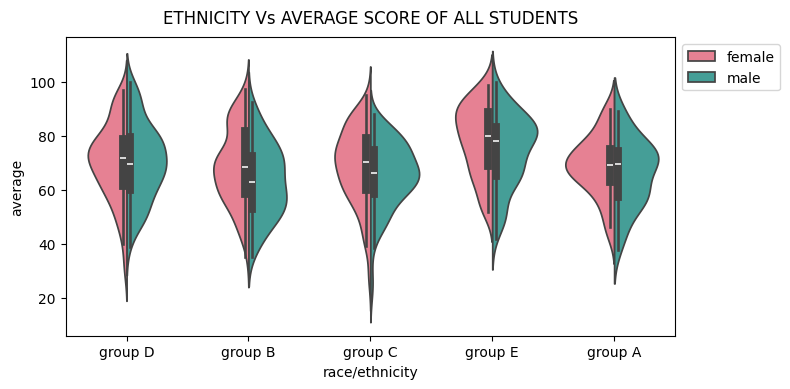

In [ ]:
# Chart - 11 visualization code
fig,ax=plt.subplots(figsize=(8,4))
g=sns.violinplot(y="average",x="race/ethnicity",data=exams,split=True,hue='gender',palette='husl')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1))
g.set_title("ETHNICITY Vs AVERAGE SCORE OF ALL STUDENTS",y=1.02)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

For comparing the distributions of a continuous variable across different groups or categories, I picked violin plot. By splitting the violins by group, I could easily visualize differences in the distributions between groups, including differences in central tendency, variability, and shape.

Violin plots provide a combination of a box plot and a kernel density plot, offering a more comprehensive visualization of the data distribution. They display summary statistics such as quartiles and median (like box plots) along with the full distribution shape (like kernel density plots), providing a richer understanding of the data.



##### 2. What is/are the insight(s) found from the chart?

1.Students belonging to Group D and Group E have secured higher average scores than others.

2.Students belonging to Group C have secured relatively lower average scores than others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impacts:

Targeted Marketing Strategies: Understanding that students from Groups D and E have higher average scores can inform targeted marketing strategies. Businesses can tailor their marketing efforts to appeal to students from these groups, highlighting the potential benefits of their services for achieving academic success. This targeted approach can attract more students from Groups D and E to enroll in their courses, leading to increased enrollment and revenue for the business.

Customized Offerings: Recognizing that students from Group C have lower average scores allows businesses to develop customized offerings tailored to the needs of these students. They can design programs specifically geared towards improving the academic performance of students from Group C, providing resources and support that address their unique challenges and goals. This personalized approach can lead to higher satisfaction rates among Group C students and potentially attract more customers.

Negative Growth:
However, there are potential negative implications to consider as well:

Perception of Exclusion: Focusing heavily on targeting students from Groups D and E with higher average scores may create a perception of exclusion among students from other groups. This could lead to decreased enrollment from students in Group C or other groups, potentially limiting the business's growth potential and exacerbating existing inequalities in education.

Reinforcing Stereotypes: Emphasizing the disparities in academic performance between different groups may reinforce stereotypes or stigmas associated with certain student demographics. This could perpetuate inequalities and hinder efforts towards promoting inclusivity and diversity within education. Businesses should be mindful of the potential negative consequences of reinforcing stereotypes and strive to promote equity and inclusivity in their marketing and offerings.

#### Chart - 12

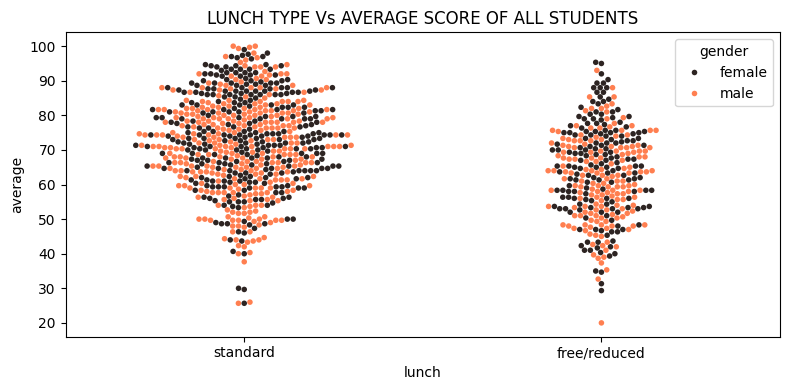

In [ ]:
# Chart - 12 visualization code
fig,ax=plt.subplots(figsize=(8,4))
g=sns.swarmplot(data=exams, x='lunch',y='average',hue='gender',s=4,palette='dark:coral')
g.set_title("LUNCH TYPE Vs AVERAGE SCORE OF ALL STUDENTS",y=1.0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Dealing with my moderate-sized dataset,I wanted to visualize individual data points while comparing different categories within my dataset.So I picked swarm plot to do this job. By plotting multiple swarms side by side, I could easily compare the distributions of different groups and identify differences and similarities between them. Unlike traditional scatter plots, swarm plots use a "swarm" algorithm to arrange points without overlapping, making it easier to visualize dense clusters of data points.

##### 2. What is/are the insight(s) found from the chart?

1.The density of Students who had standard lunch and secured higher average scores is more than the ones who had free/reduced lunch.

2.The density of students taking free lunch and scoring better average scores is little lower than the ones who had standard lunch

we can say that the type of lunch has no significant impact on average scores of students.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Let's examine the potential positive and negative business impacts of this insight:

Positive Business Impacts:

Marketing Flexibility: Understanding that the type of lunch may not significantly impact students' average scores allows businesses to adopt more flexible marketing strategies. They can focus on other factors or benefits of their educational services instead of emphasizing the lunch program. This flexibility can broaden the appeal of their offerings and attract a wider range of customers.

Inclusive Offerings: Recognizing that lunch type does not have a significant impact on average scores encourages businesses to develop inclusive offerings that cater to all students regardless of their socioeconomic backgrounds. This can enhance the perceived value of their services and attract a diverse customer base, leading to increased enrollment and revenue.

Negative Growth:
However, there are potential negative implications to consider as well:

Perception of Inequality: If businesses fail to acknowledge and address potential disparities in academic outcomes based on socioeconomic factors such as lunch type, it may perpetuate inequalities within education. This could lead to negative publicity and damage to the business's reputation, potentially resulting in decreased enrollment and revenue.

Missed Opportunity for Targeted Support: Dismissing the impact of lunch type on students' average scores may overlook the need for targeted support and interventions for students from low-income backgrounds. These students may face additional challenges outside of the classroom that can affect their academic performance. Ignoring these factors could result in missed opportunities to provide meaningful support and assistance to students in need.

#### Chart - 13

Text(0.5, 1.0, 'MATH SCORES')

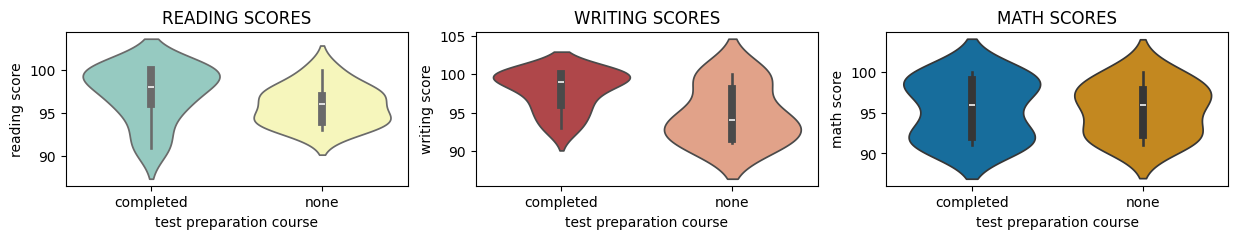

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(15,2))
custom_palette = sns.set_palette("Set3")
plt.subplot(1,3,1)
sns.violinplot(x="test preparation course",y="reading score",data=high_in_all,hue='test preparation course',legend=False,palette=custom_palette)
plt.title("READING SCORES")
custom_palette = sns.set_palette("RdBu")
plt.subplot(1,3,1)
plt.subplot(1,3,2)
sns.violinplot(x="test preparation course",y="writing score",data=high_in_all,hue='test preparation course',legend=False,palette=custom_palette)
plt.title("WRITING SCORES")
custom_palette = sns.set_palette("colorblind")
plt.subplot(1,3,1)
plt.subplot(1,3,3)
sns.violinplot(x="test preparation course",y="math score",data=high_in_all,hue='test preparation course',legend=False,palette=custom_palette)
plt.title("MATH SCORES")


##### 1. Why did you pick the specific chart?

For comparing the distributions of a continuous variable across different groups or categories, I picked violin plot. By splitting the violins by group, I could easily visualize differences in the distributions between groups, including differences in central tendency, variability, and shape.

Violin plots provide a combination of a box plot and a kernel density plot, offering a more comprehensive visualization of the data distribution. They display summary statistics such as quartiles and median (like box plots) along with the full distribution shape (like kernel density plots), providing a richer understanding of the data.



##### 2. What is/are the insight(s) found from the chart?

Among the top scorers,

1.The density of students who completed test preparation course and have secured higher reading and writing scores,is more than the ones who did not even opted for the course.
So we can say students who complete the test preparation course are more likely to score greater writing and reading scores than the ones who do not even opt for it.

2.The test preparation course has no significant impact on the math scores

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Let's analyze the potential positive and negative business impacts of these insights:

Positive Business Impacts:

Enhanced Marketing Strategies: Understanding that completing a test preparation course correlates with higher reading and writing scores among top scorers allows businesses to develop targeted marketing strategies. They can emphasize the benefits of their test preparation courses for improving reading and writing skills, attracting more students to enroll in these programs. This targeted approach can lead to increased enrollment and revenue for the business.

Customized Offerings: Recognizing that completing a test preparation course is more likely to result in higher reading and writing scores enables businesses to further develop and refine their course offerings. They can focus on enhancing the content and strategies specifically related to reading and writing skills, ensuring that students receive the support and resources necessary to excel in these areas. This personalized approach can lead to higher satisfaction rates among students and parents, fostering loyalty and positive word-of-mouth referrals.

Negative Growth:
However, there are potential negative implications to consider as well:

Limited Impact on Math Scores: While completing a test preparation course may improve reading and writing scores, the lack of significant impact on math scores may lead to decreased interest or enrollment in these courses among students and parents focused primarily on math improvement. Businesses offering test preparation courses may experience decreased enrollment or revenue if potential customers perceive limited benefits in terms of math performance.

Perception of Exclusivity: Focusing heavily on promoting the benefits of test preparation courses may create a perception of exclusivity among students who do not have access to or cannot afford these courses. This could exacerbate existing inequalities in education and hinder efforts towards promoting equity and accessibility. Businesses should be mindful of the potential negative consequences of reinforcing disparities and strive to promote inclusivity and equal opportunities for all students.

#### Chart - 14 - Correlation Heatmap

<Axes: xlabel='parental level of education'>

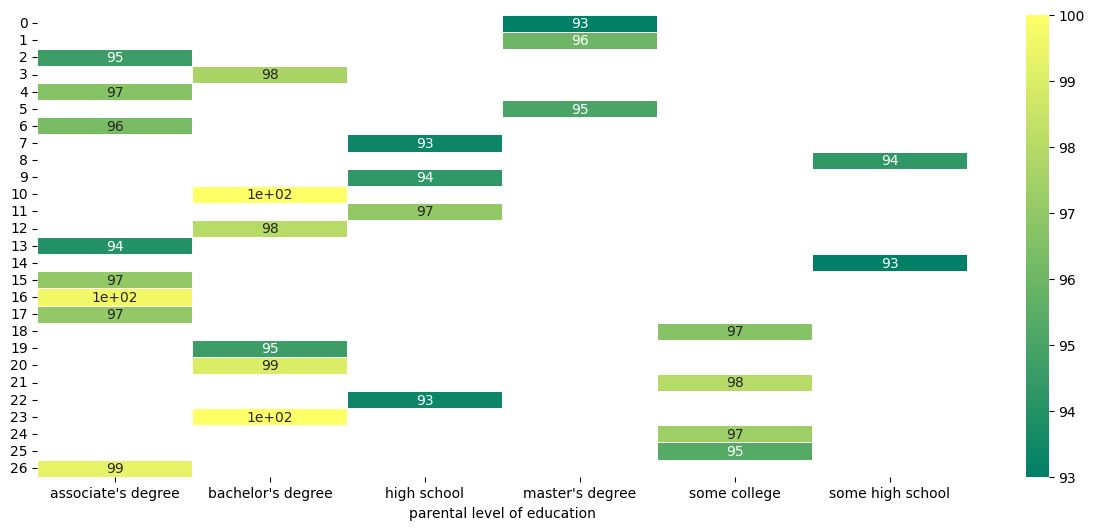

In [ ]:
# Correlation Heatmap visualization code
temp_df = high_in_all.pivot(columns='parental level of education',values='average')
plt.figure(figsize=(15,6))
sns.heatmap(temp_df,annot=True,linewidth=0.5, cmap='summer')

##### 1. Why did you pick the specific chart?

For comparison of multiple variables simultaneously,I picked heatmap. I could visualize the relationships between several variables at once, facilitating comprehensive analysis .
By displaying data values as colored cells, heatmaps highlight areas of high and low density, allowing analysts to identify groups or segments with similar characteristics.

They provide a color-coded representation of data values, making it easy to identify patterns, trends, and correlations among variables. Heatmaps are particularly useful for exploring complex datasets with multiple variables or dimensions.

##### 2. What is/are the insight(s) found from the chart?

Among the top scorers,

1.Students whose parents hold bachelor's or associate's degree are more likely to score greater average scores than others.

2.Students whose parents have just come from some high school,are a little more likely to score lesser average scores than others.

#### Chart - 15 - Pair Plot

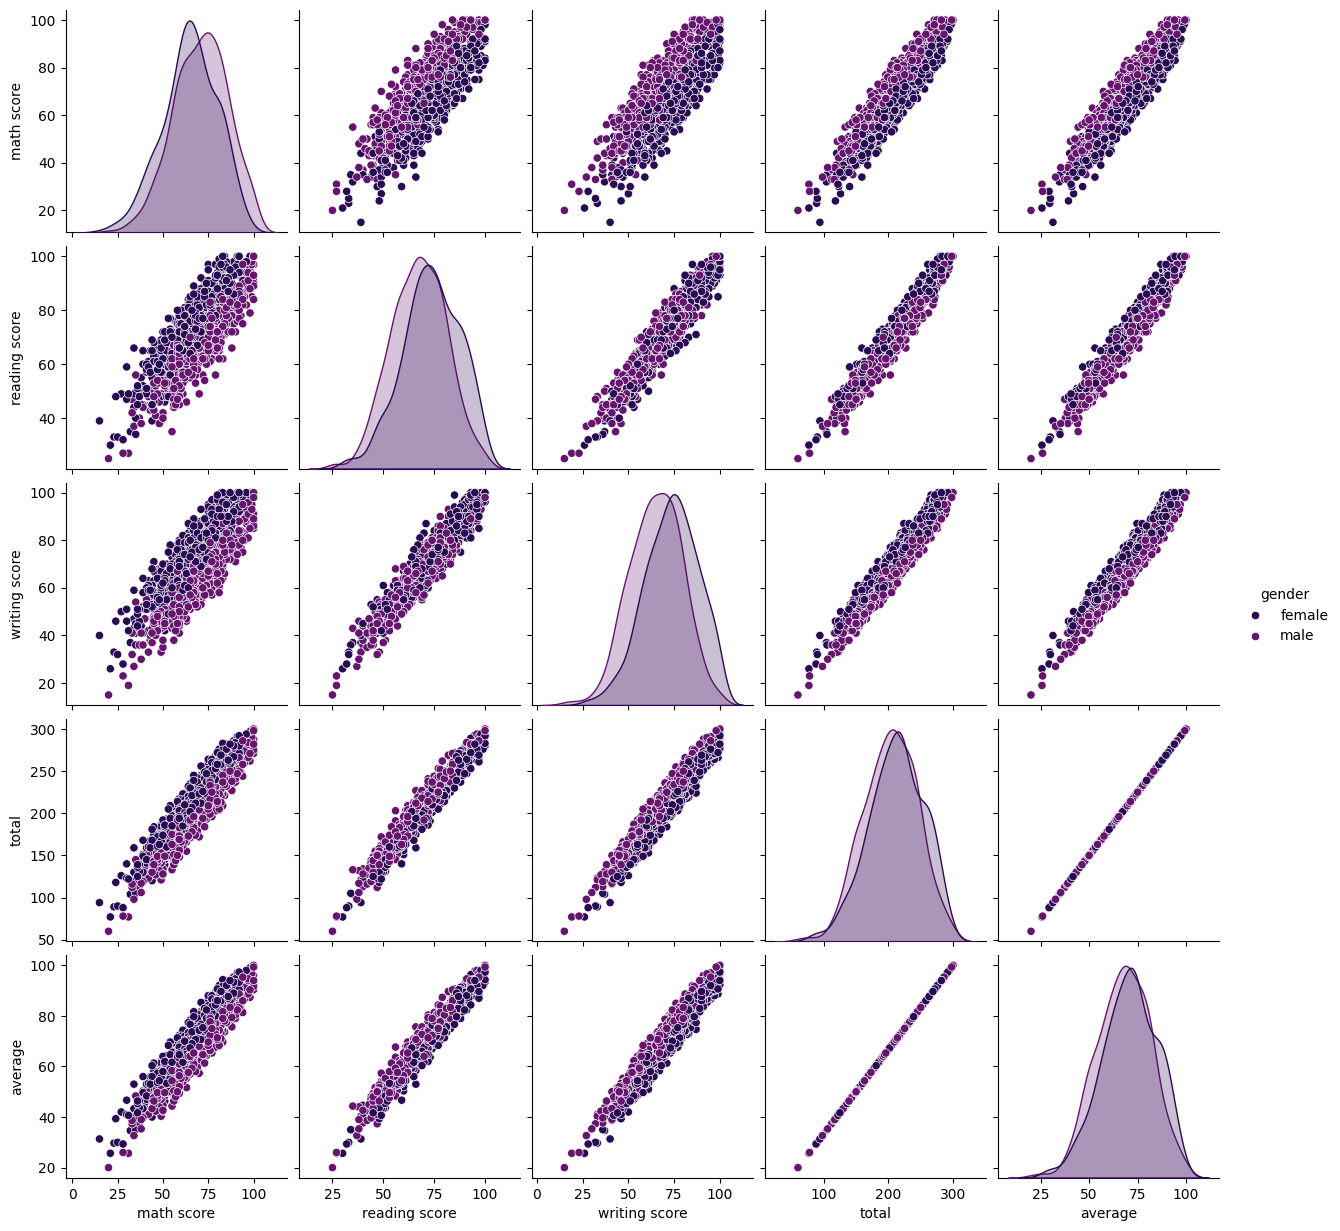

In [ ]:
# Pair Plot visualization code
custom_palette=sns.set_palette("inferno")
sns.pairplot(data=exams,hue='gender',palette=custom_palette)
plt.show()

##### 1. Why did you pick the specific chart?

Pairplots provide a comprehensive visualization of the relationships between multiple variables in a dataset. By plotting pairwise scatterplots for all combinations of variables, pairplots allow analysts to explore how variables are related to each other and identify potential patterns or trends.

Pairplots help in identifying correlations between variables. Correlation patterns, such as linear relationships or clusters of data points, are visually apparent in the scatterplots. This allows analysts to assess the strength and direction of relationships between variables and identify potential predictors or drivers of certain outcomes.

 Pairplots are useful for diagnosing multicollinearity, which occurs when independent variables in a regression model are highly correlated with each other. By examining the scatterplots, analysts can identify pairs of variables that exhibit high correlations, helping to detect potential multicollinearity issues and inform model selection or feature engineering strategies.

Detecting Outliers: Pairplots facilitate the detection of outliers within the data. Outliers, which are data points that deviate significantly from the rest of the dataset, are visually apparent as data points that fall outside the general pattern observed in the scatterplots.

 Pairplots also provide histograms along the diagonal, allowing analysts to explore the distributions of individual variables. This helps in understanding the underlying characteristics of each variable, such as central tendency, variability, and skewness, and identifying potential data distributional issues.

##### 2. What is/are the insight(s) found from the chart?

1.Male students have performed great in maths in comparison to the female students.

2.Female students have performed great in reading and writing in comparison to the male students.

3.The count of female students scoring top average scores is higher than the male students.

4.The count of male students scoring mid to bottom average scores is higher than female students.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [ ]:
#Encoding categorical columns

lablecol = exams[['parental level of education']]


ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(lablecol)

oe = pd.DataFrame(encoded_data, columns=lablecol.columns)


In [ ]:
oe

,parental level of education
0,4.0
1,0.0
2,4.0
3,4.0
4,0.0
...,...
995,4.0
996,4.0
997,2.0
998,2.0


In [ ]:
lablecol = exams[['gender','race/ethnicity','lunch', 'test preparation course']]
encoded= pd.get_dummies(lablecol,drop_first=True)
encoded.head(5)


,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,False,False,False,True,False,True,False
1,True,False,False,True,False,True,True
2,False,False,False,True,False,False,True
3,True,True,False,False,False,False,True
4,False,False,False,True,False,True,True


In [ ]:
exams = pd.concat([exams, encoded, oe], axis=1)
columns_to_drop=['gender','parental level of education','race/ethnicity','test preparation course','lunch']
exams.drop(columns=columns_to_drop, inplace=True)
exams.head()



,math score,reading score,writing score,total,average,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard,test preparation course_none
0,59,70,78,207,69.000000,False,False,False,True,False,True,False
1,96,93,87,276,92.000000,True,False,False,True,False,True,True
2,57,76,77,210,70.000000,False,False,False,True,False,False,True
3,70,70,63,203,67.666667,True,True,False,False,False,False,True
4,83,85,86,254,84.666667,False,False,False,True,False,True,True


#### What all categorical encoding techniques have you used & why did you use those techniques?

1.I have used ordinal encoding on the column 'parental level of education' because it has an inherent order or ranking among its categories.

2.I have used pandas library functions for encoding on the columns viz., 'gender' , 'race/ethnicity' , 'lunch' ,  'test preparation course' because  they are nominal variables whose categories represent distinct states or labels with no inherent order.


### 2. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=exams.drop(columns=['average','total'])
y=exams['average']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

##### What data splitting ratio have you used and why?

I have used 4:1 as the splitting ratio for training data(=80%) and testing data(=20%) respectively.
Since the dataset is not quite large ,thus I choose this ratio as appropriate.

## ***6. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

model = SVR(kernel='linear')

# Train the SVR model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
svr_y_pred = model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test, svr_y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_adjusted_r2 = 1-(1-r2_score((y_test), (svr_y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

print("Mean Absolute Error:",svr_mae)
print("Mean Squared Error:", svr_mse)
print("Root Mean Squared Error:", svr_rmse)
print("R-squared (R2) Score:", svr_r2)
print("Adjusted R2 Score:",svr_adjusted_r2)

Mean Absolute Error: 0.03528229617423882
Mean Squared Error: 0.0019159341822089144
Root Mean Squared Error: 0.04377138542711339
R-squared (R2) Score: 0.9999903752960349
Adjusted R2 Score: 0.9999898660524388


In [ ]:
SVR_Dataframe = pd.DataFrame(zip(y_test, svr_y_pred), columns = ['actual', 'predicted'])
SVR_Dataframe

,actual,predicted
0,68.666667,68.674990
1,41.000000,41.057946
2,93.333333,93.249620
3,51.666667,51.693816
4,58.333333,58.337120
...,...,...
195,50.333333,50.364662
196,67.333333,67.340317
197,70.666667,70.644976
198,53.000000,53.000805


Support Vector Regression (SVR) is a powerful algorithm that can be used for regression tasks in machine learning.
SVR can capture complex patterns and provide accurate predictions. It can handle non-linear relationships by using different kernel functions such as radial basis function (RBF), polynomial, or sigmoid.

SVR is particularly useful in the following scenarios:

Small to Medium-Sized Datasets: SVR tends to perform well on datasets with a moderate number of samples. It can handle datasets with thousands to tens of thousands of samples efficiently and effectively.

Data with Outliers: SVR is robust to outliers in the data. It uses a loss function that penalizes outliers less compared to traditional linear regression methods, making it suitable for datasets with noisy or outlying data points.

Based on the above evaluation metric scores, the SVR model appears to perform exceptionally well. It demonstrates low errors (MAE, MSE, RMSE), high explanatory power (R2 score), and robust performance even after considering model complexity (Adjusted R2 score). These results indicate that the SVR model fits the data very well and makes accurate predictions.








### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
model=RandomForestRegressor(n_estimators=10, random_state=0)

# Fit the Algorithm
model.fit(X_train,y_train)

# Predict on the model
rf_y_pred = model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_adjusted_r2 = 1-(1-r2_score((y_test), (rf_y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))



print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("Root Mean Squared Error:", rf_rmse)
print("R-squared (R2) Score:", rf_r2)
print("Adjusted R2 Score:",rf_adjusted_r2)

Mean Squared Error: 0.6704444444444436
Mean Absolute Error: 0.5613333333333331
Root Mean Squared Error: 0.8188067198334682
R-squared (R2) Score: 0.9966320193236357
Adjusted R2 Score: 0.9964538192878492


In [ ]:
Rf_Dataframe = pd.DataFrame(zip(y_test, rf_y_pred), columns = ['actual', 'predicted'])
Rf_Dataframe

,actual,predicted
0,68.666667,69.433333
1,41.000000,42.000000
2,93.333333,93.600000
3,51.666667,51.900000
4,58.333333,58.200000
...,...,...
195,50.333333,50.133333
196,67.333333,67.566667
197,70.666667,70.833333
198,53.000000,56.366667


Random Forest Regressor is a type of ensemble learning model used in machine learning for regression tasks. It's an extension of the decision tree algorithm, but instead of relying on a single decision tree, it operates by constructing a multitude of decision trees during training and outputs the average prediction of the individual trees (regression) as its final prediction.

Here's how the Random Forest Regressor works:

Ensemble of Decision Trees: A Random Forest consists of a large number of individual decision trees. Each tree is trained independently on a random subset of the training data (bootstrap sample) and a random subset of features at each split. This randomness helps to ensure diversity among the trees.

Decision Making: During training, each decision tree learns to make predictions by recursively splitting the feature space into regions, based on the feature values, that minimize the variance of the target variable within each region. This process continues until a stopping criterion is met (e.g., maximum depth of the tree, minimum number of samples required to split a node).

Prediction: When making predictions with a Random Forest Regressor, each individual tree in the forest independently predicts the target variable. The final prediction is then calculated by averaging the predictions of all the individual trees (for regression tasks). Alternatively, the median prediction can be used, which can be more robust to outliers.

Based on the above evaluation metrics, the Random Forest Regressor model appears to perform exceptionally well on the given dataset, with very low errors and a high R-squared score, indicating strong predictive performance and a good fit to the data.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Mean Squared Error (MSE):
Business Implication: MSE measures the average squared difference between predicted and actual values. A low MSE indicates that the model's predictions are close to the actual values, which is crucial for businesses aiming for accuracy in their predictions.

Business Impact: For businesses, a low MSE means that the model is making accurate predictions, reducing the risk of making costly errors. For example, in finance, a low MSE in predicting stock prices can help investors make better investment decisions, potentially increasing profits.

Mean Absolute Error (MAE):
Business Implication: MAE measures the average absolute difference between predicted and actual values. Similar to MSE, a low MAE signifies accurate predictions.

Business Impact: A low MAE ensures that the model's predictions are consistently close to the actual values. In retail, for instance, accurate demand forecasting with a low MAE can optimize inventory management, reducing stockouts and overstock situations, leading to cost savings and improved customer satisfaction.

Root Mean Squared Error (RMSE):
Business Implication: RMSE is the square root of MSE, providing a measure of the spread of errors. A low RMSE indicates that the model's predictions are relatively consistent and close to the actual values.

Business Impact: A low RMSE ensures that the model's predictions are not only accurate but also stable. In healthcare, for example, a low RMSE in predicting patient readmission rates can help hospitals allocate resources effectively, improve patient care, and reduce healthcare costs.

R-squared (R2) Score:
Business Implication: R2 score measures the proportion of variance in the dependent variable explained by the independent variables. A high R2 score indicates a good fit of the model to the data.

Business Impact: A high R2 score assures stakeholders that the model captures a significant portion of the variability in the data, making its predictions reliable. In marketing, a high R2 score in predicting customer churn can help businesses identify factors influencing churn and implement targeted retention strategies, thereby improving customer retention rates and profitability.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
model = DecisionTreeRegressor(random_state=0)

# Fit the Algorithm
model.fit(X_train,y_train)

# Predict on the model
dt_y_pred = model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, dt_y_pred)
dt_adjusted_r2 = 1-(1-r2_score((y_test), (dt_y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))


print("Mean Squared Error:", dt_mse)
print("Mean Absolute Error:", dt_mae)
print("Root Mean Squared Error:", dt_rmse)
print("R-squared (R2) Score:", dt_r2)
print("Adjusted R-squared (R2) Score:", dt_adjusted_r2)

Mean Squared Error: 2.180000000000001
Mean Absolute Error: 1.1033333333333337
Root Mean Squared Error: 1.4764823060233405
R-squared (R2) Score: 0.989048760213744
Adjusted R-squared (R2) Score: 0.9884693295372226


In [ ]:
DT_Dataframe = pd.DataFrame(zip(y_test, dt_y_pred), columns = ['actual', 'predicted'])
DT_Dataframe

,actual,predicted
0,68.666667,68.000000
1,41.000000,43.666667
2,93.333333,94.333333
3,51.666667,48.333333
4,58.333333,58.000000
...,...,...
195,50.333333,49.333333
196,67.333333,66.333333
197,70.666667,69.333333
198,53.000000,56.000000


Decision Tree Regressor is a supervised learning algorithm used for regression tasks. It works by recursively partitioning the feature space into smaller regions and making predictions based on the average of the target variable within each region. Here's a brief overview of how it works:

Splitting Criteria:
Decision trees make decisions by splitting the feature space into subsets based on certain criteria. The criteria typically used for splitting include minimizing variance or maximizing information gain.

Recursive Partitioning:
Starting from the root node, the decision tree recursively splits the data into smaller subsets based on the chosen splitting criteria. Each split creates branches that lead to child nodes.

Leaf Nodes and Predictions:
The process continues until a stopping criterion is met, such as reaching a maximum tree depth or having a minimum number of samples in each leaf node. At this point, the terminal nodes are called leaf nodes.
Each leaf node contains a prediction value, typically the mean or median of the target variable within that node's subset.

Prediction:
To make a prediction for a new data point, the decision tree traverses the tree from the root node down to a leaf node, following the path determined by the feature values of the data point.
The prediction for the data point is then based on the prediction value stored in the leaf node.

Model Interpretability:
One of the key advantages of decision trees is their interpretability. The structure of the tree can be visualized and understood easily, making it intuitive to interpret how the model makes predictions.




Based on the above evaluation metric scores, the Decision Tree Regressor model appears to perform exceptionally well. It demonstrates low errors (MAE, MSE, RMSE), high explanatory power (R2 score), and robust performance even after considering model complexity (Adjusted R2 score). These results indicate that the Decision Tree Regressor model fits the data very well and makes accurate predictions.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

R-squared (R2) Score:
Importance: R2 score measures the proportion of variance in the dependent variable explained by the independent variables. A higher R2 score indicates a better fit of the model to the data, providing more reliable predictions.

Business Impact: A higher R2 score assures stakeholders that the model captures a significant portion of the variability in the data, enhancing confidence in decision-making. In marketing, for instance, a higher R2 score in predicting customer behavior can lead to more targeted marketing campaigns, increased customer engagement, and improved return on investment.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I choose Support Vector Regression model  as my final model (with highest R2 score and least errors) for predictions because it is  performing better than the other two models.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In [ ]:
# Evaluation metrics score chart for all the three models
model_data = pd.DataFrame()
model_data['Model Name'] = ['Support Vector Regression','Decision Tree Regressor','Random Forest Regressor']
model_data['MAE'] = [svr_mae,dt_mae,rf_mae]
model_data['MSE'] = [svr_mse,dt_mse,rf_mse]
model_data['RMSE'] = [svr_rmse,dt_rmse,rf_rmse]
model_data['R2'] = [svr_r2,dt_r2,rf_r2]
model_data['Adjusted R2'] = [svr_adjusted_r2,dt_adjusted_r2,rf_adjusted_r2]
model_data

,Model Name,MAE,MSE,RMSE,R2,Adjusted R2
0,Support Vector Regression,0.035282,0.001916,0.043771,0.999990,0.999990
1,Decision Tree Regressor,1.103333,2.180000,1.476482,0.989049,0.988469
2,Random Forest Regressor,0.561333,0.670444,0.818807,0.996632,0.996454


After above observations, I choose the final model ,  Support Vector Regression with lowest MAE,MSE,RMSE and highest R2 score values that performs exceptionally well in predicting students' performance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***